In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
adasyn = pd.read_csv(r"C:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\result\db_train_test\train_adasyn.csv")
smote = pd.read_csv(r"C:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\result\db_train_test\train_smote.csv")
swsmote = pd.read_csv(r"C:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\result\db_train_test\train_swsmote.csv")
test = pd.read_csv(r"C:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\result\db_train_test\test.csv")

In [4]:
mapping = {
    'ZONA_TERRITORIAL':'category',
    'DPTO':'category',
    'SEXO':'category',
    'EDAD':'int16', 
    'PARENTESCO_JEFE_DE_HOGAR':'category', 
    'MADRE_RESIDE_HOGAR':'category',
    'PADRE_RESIDE_HOGAR':'category', 
    'SE_CONSIDERA_CAMPESINO':'category',
    'COMUNIDAD_ES_CAMPESINA': 'category',
    'ETNIA':'category', 
    'ESTADO_CIVIL':'category',
    'AFILIADO_SALUD':'category',
    'LEER_ESCRIBIR':'category', 
    'ACTUALMENTE_ESTUDIA':'category',
    'MAYOR_NIVEL_EDUCATIVO':'category',
    'ORIENTACION_SEXUAL':'category',
    'GENERO':'category', 
    'ACTIVIDAD_OCUPADA_ULTIMA_SEMANA':'int16',
    'TIPO_VIVIENDA':'category', 
    'SERVICIOS_ENERGIA_ELECTRICA':'category',
    'ESTRATO_ENERGIA_ELECTRICA':'category',
    'SERVICIOS_GAS_NATURAL':'category',
    'SERVICIOS_ALCANTARILLADO':'category', 
    'SERVICIOS_RECOLECCION_BASURAS':'category',
    'SERVICIOS_ACUEDUCTO':'category', 
    'NUMERO_HOGARES_VIVIENDA':'int16',
    'NUMERO_CUARTOS_VIVIENDA':'int16',
    'NUMERO_CUARTOS_DORMIR':'int16',
    'TIPO_SANITARIO':'category',
    'COMO_ELIMINA_BASURA':'category',
    'DONDE_OBTIENE_AGUA':'category',
    'DONDE_PREPARA_ALIMENTOS':'category',
    'TIPO_OCUPACION_VIVIENDA':'category',
    'HOGAR_TIENE_CUENTA_CORRIENTE':'category',
    'HOGAR_TIENE_CUENTA_AHORROS':'category', 
    'HOGAR_TIENE_CDT':'category',
    'HOGAR_TIENE_PRESTAMO_COMPRA_VIVIENDA':'category',
    'HOGAR_TIENE_PRESTAMO_COMPRA_VEHICULO':'category',
    'HOGAR_TIENE_PRESTAMO_LIBRE_INVERSION':'category', 
    'HOGAR_TIENE_TARJETA_CREDITO':'category',
    'NUMERO_PERSONAS_HOGAR':'int16', 
    'DISCAPACIDAD':'category'
}

In [5]:
adasyn = adasyn.astype(mapping)
smote = smote.astype(mapping)
swsmote = swsmote.astype(mapping)
test = test.astype(mapping)

In [6]:
adasyn.ACTIVIDAD_OCUPADA_ULTIMA_SEMANA = adasyn.ACTIVIDAD_OCUPADA_ULTIMA_SEMANA.astype('category')
smote.ACTIVIDAD_OCUPADA_ULTIMA_SEMANA = smote.ACTIVIDAD_OCUPADA_ULTIMA_SEMANA.astype('category')
swsmote.ACTIVIDAD_OCUPADA_ULTIMA_SEMANA = swsmote.ACTIVIDAD_OCUPADA_ULTIMA_SEMANA.astype('category')
test.ACTIVIDAD_OCUPADA_ULTIMA_SEMANA = test.ACTIVIDAD_OCUPADA_ULTIMA_SEMANA.astype('category')

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
def eval_model(data: pd.DataFrame, target:str, wt:str, test:pd.DataFrame):
    
    # Selección de conjuntos de datos
    X_train = data.drop(columns = [target, wt])
    y_train = data[target]
    weight = data[wt]
    
    X_test = test.drop(columns = [target, wt])
    y_test = test[target]
    
    # Seleccion de Variables
    vars_numeric = X_train.select_dtypes(include = ['int16']).columns.to_list()
    vars_categoric = X_train.select_dtypes(include = ['category']).columns.to_list()
    
    # Pipelines
    preproccessing= ColumnTransformer(
        transformers=[('num', StandardScaler(), vars_numeric),('cat', OneHotEncoder(drop='first'), vars_categoric)]
        )

    pipeline= Pipeline(steps=[('Procesamiento', preproccessing)])
    X_train= pipeline.fit_transform(X_train, y_train).toarray()
    
    # Regresión Logística
    lm = LogisticRegression()
    lm.fit(X_train, y_train, sample_weight= weight)
    
    # Predicción del conjunto de Prueba
    X_test = pipeline.transform(X_test).toarray()
    y_pred = lm.predict(X_test)
    
    # Evaluación del modelo
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    # Métricas de Clasificación
    results = pd.DataFrame({
        'f1_score': f1_score(y_test,y_pred),
        'precision_score':precision_score(y_test, y_pred),
        'recall_score': recall_score(y_test, y_pred),
        'accuracy_score':accuracy_score(y_test,y_pred)}, index = [0])

    display(results)
    
    # Area bajo la curva
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)

    print("AUC:", auc_score)
    

In [15]:
target = 'ACTIVIDAD_OCUPADA_ULTIMA_SEMANA'
wt_str = 'FACTOR_EXPANSION'

c:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


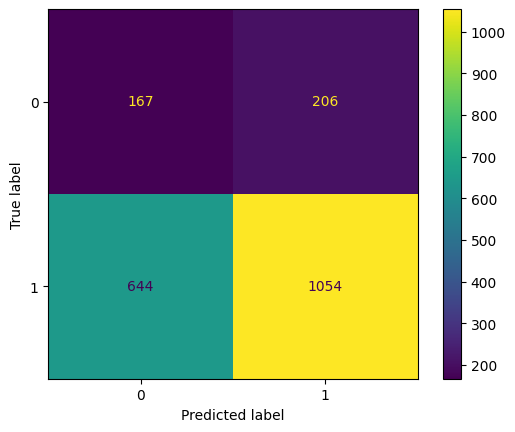

,f1_score,precision_score,recall_score,accuracy_score
0,0.712644,0.836508,0.62073,0.58957


AUC: 0.5342257252658071


In [16]:
eval_model(adasyn, target, wt_str, test)

c:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


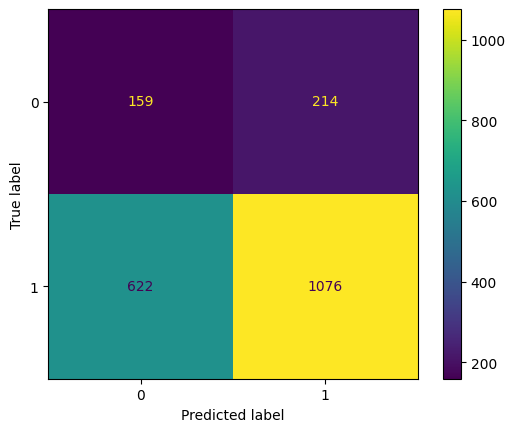

,f1_score,precision_score,recall_score,accuracy_score
0,0.720214,0.834109,0.633687,0.59633


AUC: 0.5299800743344164


In [17]:
eval_model(smote, target, wt_str, test)

c:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


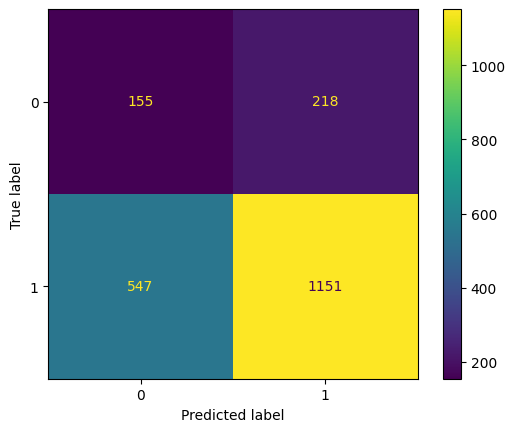

,f1_score,precision_score,recall_score,accuracy_score
0,0.750571,0.84076,0.677856,0.630613


AUC: 0.5467029496932205


In [18]:
eval_model(swsmote,target, wt_str, test)

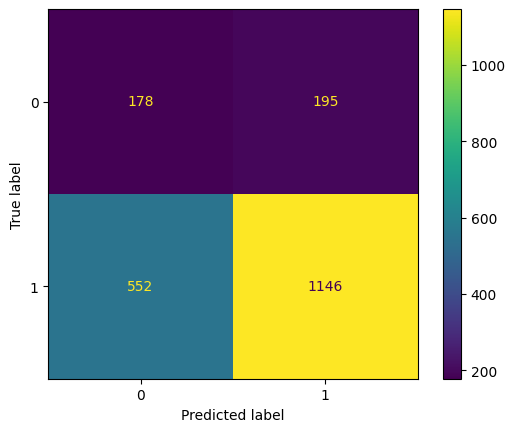

,f1_score,precision_score,recall_score,accuracy_score
0,0.754195,0.854586,0.674912,0.639305


AUC: 0.576061728512017


In [20]:
# Selección de conjuntos de datos
X_train = swsmote.drop(columns = [target, wt_str])
y_train = swsmote[target]
weight = swsmote[wt_str]

X_test = test.drop(columns = [target, wt_str])
y_test = test[target]

# Seleccion de Variables
vars_numeric = X_train.select_dtypes(include = ['int16']).columns.to_list()
vars_categoric = X_train.select_dtypes(include = ['category']).columns.to_list()

# Pipelines
preproccessing= ColumnTransformer(
    transformers=[('num', StandardScaler(), vars_numeric),('cat', OneHotEncoder(drop='first'), vars_categoric)]
    )

pipeline= Pipeline(steps=[('Procesamiento', preproccessing)])
X_train= pipeline.fit_transform(X_train, y_train).toarray()

# Regresión Logística
base_learners = [
                 ('clf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('clf_2', DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=42))             
                ]
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(),cv=10, n_jobs=-1)
clf.fit(X_train, y_train, sample_weight= weight)

# Predicción del conjunto de Prueba
X_test = pipeline.transform(X_test).toarray()
y_pred = clf.predict(X_test)

# Evaluación del modelo
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Métricas de Clasificación
results = pd.DataFrame({
    'f1_score': f1_score(y_test,y_pred),
    'precision_score':precision_score(y_test, y_pred),
    'recall_score': recall_score(y_test, y_pred),
    'accuracy_score':accuracy_score(y_test,y_pred)}, index = [0])

display(results)

# Area bajo la curva
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

print("AUC:", auc_score)

In [21]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [22]:
estimators = {
    "decision_tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random_Forest": RandomForestClassifier(n_estimators = 200, random_state = 123),
    "Logistic_Regression": LogisticRegression(penalty='l1')
}

In [23]:
parametros = {
    "decision_tree": {
        "decision_tree__criterion": ["gini", "entropy"],
        "decision_tree__max_depth": [i for i in range(1,15)],
    },
    "KNN": {
        "KNN__n_neighbors": [i for i in range(1,20)],
        "KNN__weights": ["uniform", "distance"],
    },
    "Random_Forest": {
        'Random_Forest__n_estimators': [100, 200, 300],
        'Random_Forest__max_depth': [None, 10, 20],
        'Random_Forest__min_samples_split': [2, 5, 10],
    },
    "Logistic_Regression":{
        "Logistic_Regression__penalty":['l1','l2','elasticnet'],
        "Logistic_Regression__solver":['lbfgs','liblinear']
    }
}

In [25]:
from sklearn.model_selection import GridSearchCV

modelo = dict()
for estimador in estimators.keys():
    
    pipeline = Pipeline(steps = [(estimador, estimators[estimador])]
                        ) 
    
    modelo[estimador] = GridSearchCV(pipeline, parametros[estimador], cv=5, scoring='accuracy', n_jobs=-1)
    
    modelo[estimador].fit(X_train, y_train.values.ravel())
    print("Modelo {}".format(estimador))
    print("Los mejores parámetros para el estimador son {}".format( modelo[estimador].best_params_))
    print("Accuracy: {}".format(modelo[estimador].best_score_))
    print("El Score respecto a la base de prueba es: {}".format(modelo[estimador].score(X_test,y_test)))
    print("="*20)

Modelo decision_tree
Los mejores parámetros para el estimador son {'decision_tree__criterion': 'gini', 'decision_tree__max_depth': 12}
Accuracy: 0.6751554456000448
El Score respecto a la base de prueba es: 0.6885562530178657
Modelo KNN
Los mejores parámetros para el estimador son {'KNN__n_neighbors': 9, 'KNN__weights': 'uniform'}
Accuracy: 0.637822800823065
El Score respecto a la base de prueba es: 0.5803959439884114
Modelo Random_Forest
Los mejores parámetros para el estimador son {'Random_Forest__max_depth': 20, 'Random_Forest__min_samples_split': 5, 'Random_Forest__n_estimators': 300}
Accuracy: 0.7132557506465224
El Score respecto a la base de prueba es: 0.7754707870593917


c:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\venv\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\venv\lib\s

Modelo Logistic_Regression
Los mejores parámetros para el estimador son {'Logistic_Regression__penalty': 'l2', 'Logistic_Regression__solver': 'lbfgs'}
Accuracy: 0.7304725418137856
El Score respecto a la base de prueba es: 0.6803476581361662


c:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


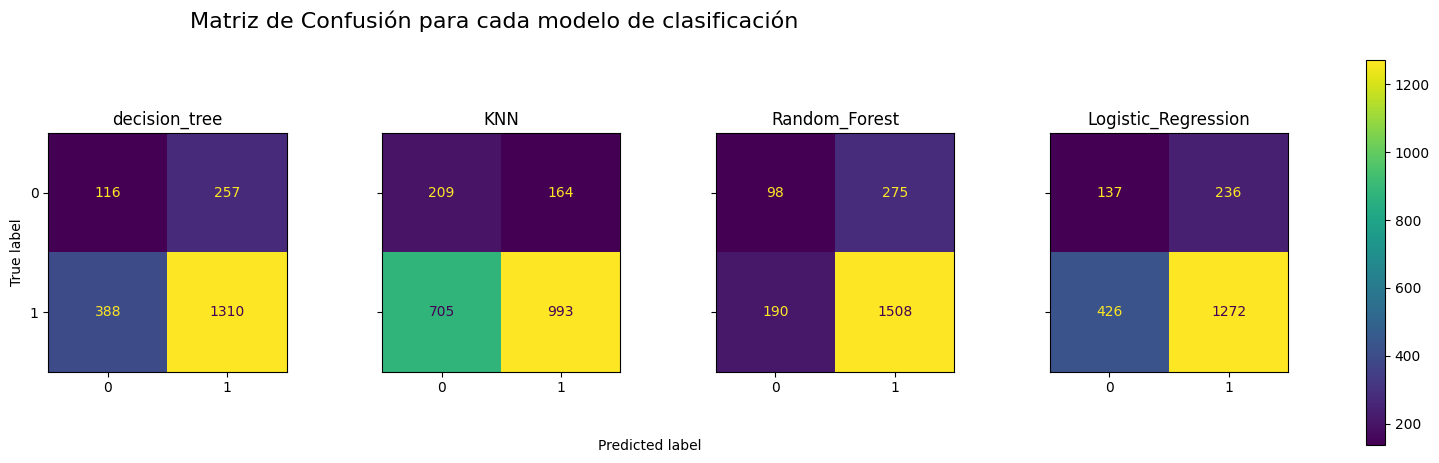

In [27]:
f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')

for i,model in enumerate(modelo.keys()):
    y_pred = modelo[model].best_estimator_.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axes[i], colorbar=False)
    axes[i].set_title(model)
    #disp.im_.colorbar.remove()
    axes[i].set_xlabel('')
    if i!=0:
        axes[i].set_ylabel('')

f.suptitle("Matriz de Confusión para cada modelo de clasificación", fontsize = 16, ha = 'right')
f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()

In [28]:
results = pd.DataFrame(columns=['f1_score','precision_score','recall_score','accuracy_score'])
for model in modelo:
    y_pred = modelo[model].best_estimator_.predict(X_test)
    data = pd.DataFrame(
         {
             #'modelo':model,
             'f1_score': f1_score(y_test,y_pred),
             'precision_score':precision_score(y_test, y_pred),
             'recall_score': recall_score(y_test, y_pred),
             'accuracy_score':accuracy_score(y_test,y_pred)
             }, index=[model]
         )
    results = pd.concat([results,data], ignore_index=False)

display(results)

C:\Users\andre\AppData\Local\Temp\ipykernel_22400\3518206267.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results,data], ignore_index=False)


,f1_score,precision_score,recall_score,accuracy_score
decision_tree,0.802450,0.835992,0.771496,0.688556
KNN,0.695622,0.858254,0.584806,0.580396
Random_Forest,0.866418,0.845766,0.888104,0.775471
Logistic_Regression,0.793512,0.843501,0.749117,0.680348


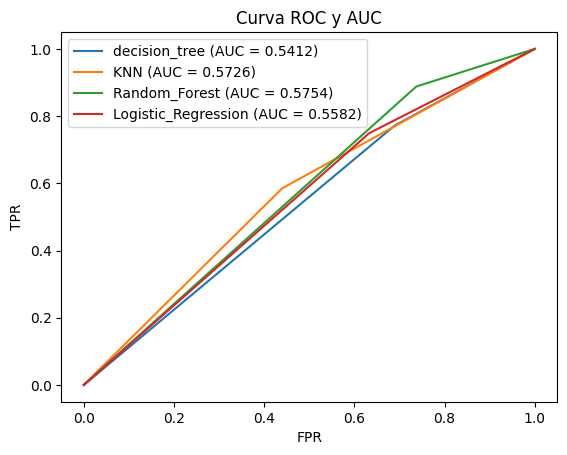

In [29]:
roc_auc_dict = dict()
for model in modelo:
    y_pred = modelo[model].best_estimator_.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    # Guardar los resultados
    roc_auc_dict[model] = {
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc
    }
    
plt.figure()
for model in roc_auc_dict:
    fpr = roc_auc_dict[model]['fpr']
    tpr = roc_auc_dict[model]['tpr']
    roc_auc = roc_auc_dict[model]['roc_auc']

    plt.plot(fpr, tpr, label = model + ' (AUC = {:.4f})'.format(roc_auc))

plt.title("Curva ROC y AUC")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()